# <center> Reading and Extracting Data from Documents </center>

## Objective:
This notebook aims to illustrate methods for extracting data from two common document types: PDFs (numerical documents) and images (scanned documents).

## Plan:
1. Read and process text from scanned images
2. Extract text from PDF files (digital, numerical data)
3. Visualize and organize the extracted data (broadly)
4. Provide a visual summary (wordmap) of the extraction results

Texts can come from various sources and exist in different forms, such as handwritten notes or digitized documents. They can also be found in native digital formats, like documents, emails, web pages (articles, blogs, etc.), or even on social media.

<!-- Les textes peuvent provenir de différentes sources et se présenter sous plusieurs formes, telles que des notes manuscrites ou des documents numérisés. On peut également les retrouver dans des formats numériques natifs, comme des documents, des e-mails, des pages web (articles, blogs, etc.) ou encore sur les réseaux sociaux. -->


***

<!--## Author:-->
<div style="text-align: right;"><h3>Author:  <a href="https://issouani.perso.math.cnrs.fr/">El Mehdi ISSOUANI</a></h3></div>

***

# Required packages
#### For reading the raw image
```
conda install -c conda-forge opencv
```
### For transforming the image to text
```
sudo apt-get update
sudo apt-get install tesseract-ocr
sudo apt-get install tesseract-ocr-spa
```

In [ ]:
#!sudo apt-get install tesseract-ocr tesseract-ocr-spa
!pip install pytesseract

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download; download("stopwords")
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

import pytesseract
from pytesseract import Output

import cv2
print(cv2.__version__)

# If working on google colab instead of a local jupyter notebook
# from google.colab.patches import cv2_imshow

4.7.0


[nltk_data] Downloading package stopwords to /home/mehdi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data acquisition 

Texts can come from various sources and take different forms:

- Handwritten notes and digitized documents
- Native digital documents:
    - Documents, emails, etc.
    - Web pages (articles, blogs, etc.) and social media.

## Reading images

### Handwritten documents

#### To import the handwritten note

In [162]:
!wget -O note-manuscrite.png https://raw.githubusercontent.com/El-Mehdi-42/Extracting-and-reading-data/refs/heads/main/files/note-manuscrite.png

--2024-12-02 19:45:01--  https://raw.githubusercontent.com/El-Mehdi-42/Extracting-and-reading-data/refs/heads/main/files/note-manuscrite.png
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 54304 (53K) [image/png]
Enregistre : ‘note-manuscrite.png’

note-manuscrite.png 100%[===================>]  53,03K  --.-KB/s    ds 0,1s    

2024-12-02 19:45:01 (475 KB/s) - ‘note-manuscrite.png’ enregistré [54304/54304]



In [163]:
import cv2

image_path = 'note-manuscrite.png'
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not loaded correctly. Please check the file path.")

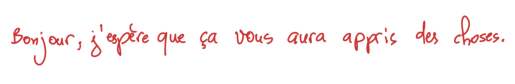

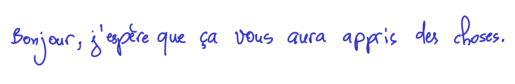

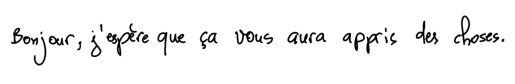

In [170]:
image = cv2.imread("note-manuscrite.png")

# if the photo is vertically reversed, use:
# image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)  

# to turn the photo black and white instead of colors
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.axis('off')
plt.imshow(image)
plt.show()

# To display the colored photo, in the original color
plt.axis('off')
# Convert color from BGR (OpenCV format) to RGB (Matplotlib format)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [87]:
d = pytesseract.image_to_string(gray, output_type=Output.DICT)
print(d['text'])

# print(pytesseract.image_to_boxes(gray))

Pow) euc i, coe que Ca \YOus quia apes Aes Doses,



In [90]:
d2 = pytesseract.image_to_string(gray, output_type=Output.DICT, lang = "fra")
print(d2['text'])

print(pytesseract.image_to_boxes(gray, lang="fra")[:200])

Ponieuc ; s te que ça Vous qura apps des Dose.

P 4 110 48 169 0
o 48 109 75 138 0
n 60 27 110 173 0
i 76 31 133 155 0
e 133 27 159 173 0
u 146 27 171 173 0
c 143 104 198 140 0
; 219 87 263 145 0
s 298 62 327 183 0
t 435 66 466 185 0
e 464 113 502 


### Analyse du Résultat de `pytesseract.image_to_boxes`

Chaque ligne correspond à un caractère reconnu et contient les informations suivantes :


#### Explication des Champs :
1. **`<caractère>`** : Le caractère détecté.
2. **`<x_min>` et `<y_min>`** : Coordonnées du coin inférieur gauche de la boîte englobante.
3. **`<x_max>` et `<y_max>`** : Coordonnées du coin supérieur droit de la boîte englobante.
4. **`<numéro_de_page>`** : Numéro de page (utile pour les documents multipages, généralement `0` pour une seule page).

#### Exemple Détaillé :
Voici l'analyse des lignes suivantes :


1. **`P 4 110 48 169 0`**
   - **Caractère :** `P`
   - **Coordonnées de la boîte :** 
     - Coin inférieur gauche : `(4, 110)`
     - Coin supérieur droit : `(48, 169)`
   - **Page :** `0`

2. **`o 48 109 75 138 0`**
   - **Caractère :** `o`
   - **Coordonnées de la boîte :** 
     - Coin inférieur gauche : `(48, 109)`
     - Coin supérieur droit : `(75, 138)`
   - **Page :** `0`

---

$\longrightarrow$ Ce format permet d'analyser les résultats et de visualiser la position des caractères détectés dans l'image.

### Read the file (image)

In [175]:
!wget -O numerical_doc.png https://raw.githubusercontent.com/El-Mehdi-42/Extracting-and-reading-data/refs/heads/main/files/numerical_doc.png

--2024-12-02 19:48:05--  https://raw.githubusercontent.com/El-Mehdi-42/Extracting-and-reading-data/refs/heads/main/files/numerical_doc.png
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 78944 (77K) [image/png]
Enregistre : ‘numerical_doc.png’

numerical_doc.png   100%[===================>]  77,09K  --.-KB/s    ds 0,02s   

2024-12-02 19:48:05 (3,49 MB/s) - ‘numerical_doc.png’ enregistré [78944/78944]



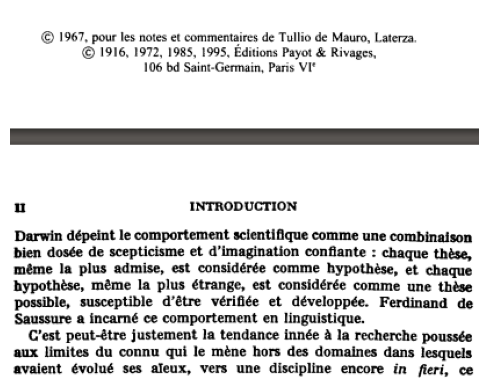

In [176]:
scanned_doc = cv2.imread("numerical_doc.png")

plt.axis('off')
plt.imshow(scanned_doc)
plt.show()

### To crop the image

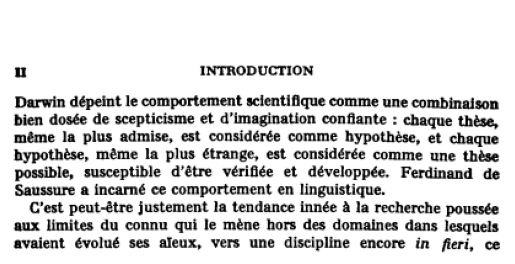

In [177]:
scanned_doc = cv2.imread("numerical_doc.png")
gray = cv2.cvtColor(scanned_doc, cv2.COLOR_BGR2GRAY)
# gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

scanned_doc = scanned_doc[120:, :]

plt.axis('off')
plt.imshow(scanned_doc)
plt.show()

In [178]:
darwin_text = pytesseract.image_to_string(scanned_doc, output_type=Output.DICT, lang = "fra")["text"]
#print(d2['text'])

print(darwin_text)
print(pytesseract.image_to_boxes(scanned_doc, lang="fra")[:100])

“ INTRODUCTION

Darwin dépeint le comportement scientifique comme une combinaison
bien dosée de scepticisme et d'imagination conflante : chaque thèse,
même la plus admise, est considérée comme hypothèse, et chaque
hypothèse, même la plus étrange, est considérée comme une thèse
possible, susceptible d'être vérifiée et développée. Ferdinand de
Saussure a incarné ce comportement en linguistique.

C'est peut-être justement Ia tendance innée à la recherche poussée
aux limites du connu qui le mène hors des domaines dans lesquels
avaient évolué ses aleux, vers une discipline encore in fleri, ce

“ 4 143 13 152 0
I 155 145 159 153 0
N 155 145 170 153 0
T 160 145 184 153 0
R 169 145 184 153 0
O 1


***

***

### Digitally native documents

In [131]:
# !pip install PyPDF2 
import PyPDF2
from PyPDF2 import PdfReader

# Open with your browser the link below
!wget "https://donneespubliques.meteofrance.fr/donnees_libres/bulletins/BQA/20240930.pdf"
FILE = "20240930.pdf"

# To get another date, you just need to change the number 20240930 to the date you want in the format yyyymmdd 

--2024-12-02 19:29:42--  https://donneespubliques.meteofrance.fr/donnees_libres/bulletins/BQA/20240930.pdf
Résolution de donneespubliques.meteofrance.fr (donneespubliques.meteofrance.fr)… 137.129.43.49
Connexion à donneespubliques.meteofrance.fr (donneespubliques.meteofrance.fr)|137.129.43.49|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 2983390 (2,8M) [application/pdf]
Enregistre : ‘20240930.pdf’

20240930.pdf        100%[===================>]   2,84M  2,50MB/s    ds 1,1s    

2024-12-02 19:29:43 (2,50 MB/s) - ‘20240930.pdf’ enregistré [2983390/2983390]



In [132]:
# Quite uninteresting information (just in case)
from PyPDF2 import PdfReader

# Open the PDF file
with open(FILE, 'rb') as f:
    pdf = PdfReader(f)
    # Access metadata
    information = pdf.metadata
    print(information)

# Create the PDF reader object
pdfReader = PdfReader(FILE)

# Extract text from all pages
text = ''
for i in range(len(pdfReader.pages)):
    # Access a page object
    pageObj = pdfReader.pages[i]
    # Extract text from the page
    text += pageObj.extract_text()

print("\n--------------- Extraction ---------------\n")
print(text[:142])

{'/CreationDate': "D:20240930184018+02'00'", '/Creator': 'Adobe InDesign 19.5 (Windows)', '/ModDate': "D:20241129161637+01'00'", '/Producer': 'Adobe PDF Library 17.0', '/Trapped': '/False'}

--------------- Extraction ---------------

Bulletin Climatique Quotidien  du lundi 30 septembre 2024
B
B
B
HBH
B12
11
13
12
1312
1212
1413
13
1112
1612121212
91110
1411
17
1212
1211
131


In [133]:
import re
clean_txt = re.sub("™", "'", text)
text

'Bulletin Climatique Quotidien  du lundi 30 septembre 2024\nB\nB\nB\nHBH\nB12\n11\n13\n12\n1312\n1212\n1413\n13\n1112\n1612121212\n91110\n1411\n17\n1212\n1211\n1311\n14131113\n111111\n1111\n13\n1310\n111512\n11\n91513\n13121110\n1311\n15\n12\n811\n10\n99\n1191410\n14\n1313\n12988\n13129\n15\n1210\n13111388\n11\n88\n1310\n138\n8\n9\n101099\n158\n78\n12\n1715\n30/09/2024\n−26−24−22−20−18−16−14−12−10−8−6−4−2024681012141618202224262830323436384042˚C\n1\n2\n1\n4\n23\n01\n00\n0\n01\n10038\n012\n70\n0\n010\n01\n00\n1500\n204\n15\n0\n00\n0121\n1\n121\n0000\n00\n7\n1\n03\n0\n00\n0002\n1\n00\n0113\n012\n0\n00\n00113\n2\n02\n00\n11\n1\n0\n0110\n09\n00\n0\n00\n30/09/2024\n1510203040506080100120150200mm\n16\n17\n18\n20\n2018\n2517\n2522\n25\n2618\n2120171617\n251916\n1918\n21\n2518\n2215\n2217\n22182019\n191917\n2016\n17\n2418\n271818\n20\n181816\n24252121\n2017\n17\n22\n1818\n21\n1917\n23191618\n17\n2316\n25181916\n212417\n23\n2322\n2421241816\n21\n1915\n2321\n2216\n18\n19\n26202120\n2215\n2120\n2

### Si on veut costumiser la réponse 

In [139]:
# Texte brut
raw_text = text

# Suppression des informations redondantes
cleaned_text = re.sub(r"©Météo-France", "", raw_text)  # Supprime les marques ©
cleaned_text = re.sub(r"Précipitations.*\)", "", cleaned_text, flags=re.DOTALL)  # Supprime le bloc de précipitations en 24h
cleaned_text = re.sub(r"Températures.*?T :.*?\n", "", cleaned_text, flags=re.DOTALL)  # Supprime les blocs inutiles sur les températures
cleaned_text = re.sub(r"30/09/2024", "", cleaned_text)  # Supprime les dates répétées
cleaned_text = re.sub(r"km/h\n.*\n", "", cleaned_text)  # Supprime les blocs inutiles sur les vents
cleaned_text = re.sub(r"={3,}", "", cleaned_text)  # Supprime les séparateurs inutiles

# Extraction des sections importantes
date = re.search(r"Bulletin Climatique Quotidien\s+du\s+(.+)", cleaned_text).group(1)
summary = re.search(r"Lundi 30 septembre : (.+?)(?:En fin de journée|nuit|En matinée)", cleaned_text, flags=re.DOTALL).group(1).strip()
temperatures = re.findall(r"(\d+\.?\d*)\s°C", cleaned_text)

# Structuration des résultats
output = f"""
# Bulletin Climatique Quotidien
## Date : {date}

### Résumé :
{summary}

### Températures (en °C) :
- {', '.join(temperatures) if temperatures else "Aucune température trouvée"}
"""

print(output)


# Bulletin Climatique Quotidien
## Date : lundi 30 septembre 2024

### Résumé :
en altitude, le flux est rapide d’ouest, piloté par un minimum sur le nord 
de l’Irlande qui se décale vers la mer du Nord en se comblant légèrement. En surface, une 
dépression sur le sud des îles Britanniques se creuse en se décalant en mer du Nord. L’onde 
"K" s’enroule autour de cette dépression et engendre un retour pluvieux sur les régions au nord 
de la Loire. Sur la moitié sud, de faibles pluies se produisent en lien avec la trace du front froid 
de l’onde "K" de la Gironde aux Alpes.

### Températures (en °C) :
- 3, 8, 5.6, 4, 17.1, 3, 4, 5, 27.3



### Your turn 

Try to load the daily weather report from Met Office UK using this link

https://digital.nmla.metoffice.gov.uk/download/file/IO_8399517f-6890-44b7-8a48-e2880f78d511



### Representation (vectorielle à base de comptage)

In [140]:
with open("La_Bruna_2018.final.txt") as f:
    lines = [line.strip() for line in f.readlines()]

#tf_vectorizer = CountVectorizer() 
#tf_vectorizer = CountVectorizer(stop_words=['the','we','should','this','to','and','all','of','by','for']) 
tf_vectorizer = CountVectorizer(stop_words=stopwords.words("english"))
tf_vectorizer.fit(lines)

X = tf_vectorizer.transform(lines)
X = X.toarray()
## features = tf_vectorizer.get_feature_names()  <-- Deprecated
features = tf_vectorizer.get_feature_names_out()

(num_doc, num_f) = X.shape

print(X.shape)
print(features)

(201, 1332)
['000' '10' '100' ... 'zhao' 'zone' 'zones']


In [141]:
# Wordcloud : an oversimplified summary of the text 

cloud_labels = features

cloud_weights = np.sum(X, axis=0)                   # sum across lines
dictionary = dict(zip(cloud_labels, cloud_weights)) # paste features names & weigths
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_by_value[0:50])

[('al', 108), ('et', 108), ('fault', 108), ('messinian', 106), ('faults', 82), ('fig', 70), ('throw', 68), ('early', 53), ('alpi', 35), ('monte', 35), ('profile', 35), ('lower', 29), ('pre', 29), ('geometry', 28), ('set', 26), ('basin', 25), ('computed', 25), ('data', 22), ('carbonates', 21), ('cretaceous', 21), ('foreland', 21), ('profiles', 21), ('ca', 20), ('system', 20), ('post', 19), ('two', 18), ('shows', 17), ('values', 17), ('displacement', 16), ('geological', 16), ('network', 16), ('nw', 16), ('shaped', 16), ('stratigraphic', 16), ('structural', 16), ('whereas', 16), ('2000', 15), ('along', 15), ('area', 15), ('flat', 15), ('insert', 15), ('topped', 15), ('upper', 15), ('apulian', 14), ('sets', 14), ('southern', 14), ('surfaces', 14), ('1988', 13), ('1995', 13), ('2017', 13)]


### Visual summary for the most 50 frequent words

If you want to show more or less words, change the ```limit``` in the code below.

In [142]:
from wordcloud import WordCloud

limit = 50
bgcolor = '#decece'

wordcloud = WordCloud(
    max_words=limit,
    background_color=bgcolor,
).fit_words(dictionary)

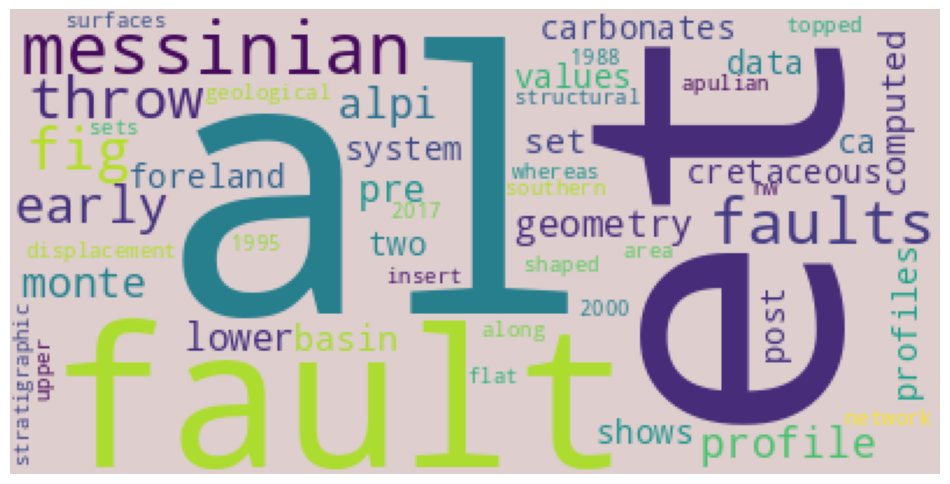

In [143]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(14)

title = "Wordcloud"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

[('comme', 3), ('est', 3), ('et', 3), ('la', 3), ('une', 3), ('ce', 2), ('chaque', 2), ('comportement', 2), ('considérée', 2), ('de', 2)]


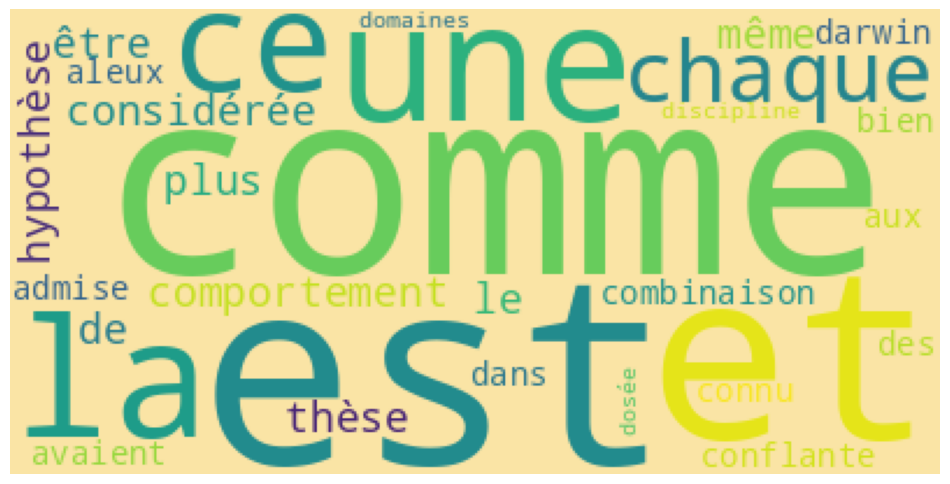

In [144]:
tf_vectorizer = CountVectorizer(stop_words=stopwords.words("english"))
tf_vectorizer.fit([i for i in darwin_text.split(" ")])

X = tf_vectorizer.transform([i for i in darwin_text.split(" ")])
X = X.toarray()
features = tf_vectorizer.get_feature_names_out()
cloud_labels = features

cloud_weights = np.sum(X, axis=0)                   # sum across lines
dictionary = dict(zip(cloud_labels, cloud_weights)) # paste features names & weigths
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_by_value[0:10])


limit = 30
bgcolor = '#fae4a5'

wordcloud = WordCloud(
    max_words=limit,
    background_color=bgcolor,
).fit_words(dictionary)

fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(14)

title = "Wordcloud"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()